#### Visualização de Dados

In [1]:
# Import dos pacotes que serão utilizados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### Obtenção dos dados

Os dados foram obtidos do curso de Ciência de dados do prof Fernando Amaral.

Nessa primeira parte é feita a vizualização dos dados `trees`. Depois de importar os dados e salvá-los em forma de dataframe do pandas, o atributo `shape` mostra o número de linhas e colunas do dataframe e o método `head` mostra as cinco primeiras entradas.


In [2]:
dataset = pd.read_csv("data/trees.csv")
dataset.shape

(31, 3)

In [3]:
dataset.head()

,Girth,Height,Volume
0,8.3,70,10.3
1,8.6,65,10.3
2,8.8,63,10.2
3,10.5,72,16.4
4,10.7,81,18.8


Com essas informações, o dataset é composto por 31 entradas e 3 atributos que são as linhas e colunas. As colunas, que são os atributos das árvores armazenadas são `Girth` que é a circunferência do tronco da árvore, `Height` que é a altura e `Volume` que é o volume.

O método `title` exibe um título para o gráfico, `xlabel` é uma identificação para o eixo x, analogamente, `ylabel` é uma identificação para o eixo y.

Text(0.5, 0, 'Altura')

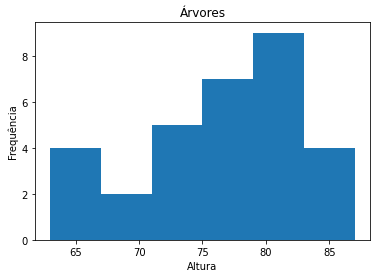

In [4]:
plt.hist(dataset.iloc[:, 1], bins=6)
plt.title("Árvores")
plt.ylabel("Frequência")
plt.xlabel("Altura")

Através da biblioteca `matplotlib` é possível gerar um histograma utilizando a base de dados pelo método `hist`. Com esse histograma observa-se como os dados estão distribuídos. O argumento `bins` determina a quantidade de grupos de dados que serão representados. Se forem utilizados muitos grupos é provável que o histograma perca sua força, o histograma é um gráfico que evidencia a distribuição dos dados, muitos grupos dificulta a realização dessa tarefa.

Uma outra forma de gerar um histograma é através da biblioteca `seaborn`, nela o método `histplot`, que funciona de forma muito semelhante ao método `hist` da `matplotlib`. O atributo `kde` com o valor padrão `False` exibe uma linha de densidade que mostra a função de distribuição aproximada dos dados.

<AxesSubplot:xlabel='Height', ylabel='Count'>

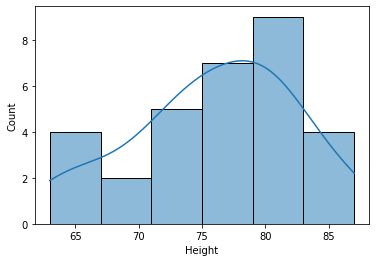

In [5]:
sns.histplot(dataset.iloc[:, 1], bins=6, kde=True)

Para gráfico de dispersão com o matplotlib utiliza-se o método `scatter`. Esse método possui os atributos de dados para os eixos horizontal e vertical, necessitando de duas variáveis numéricas contínuas. Pode ser passado cor no argumento `color` e cor de fundo `facecolors`. O argumento `marker` diz qual vai ser o formato dos pontos dos dados.

Text(0, 0.5, 'Volume')

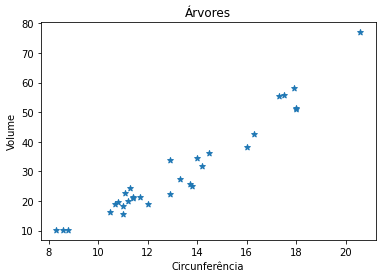

In [6]:
plt.scatter(x=dataset.Girth, y=dataset.Volume, marker="*")
plt.title("Árvores")
plt.xlabel("Circunferência")
plt.ylabel("Volume")

Um gráfico de linhas pode ser criado usando o método `plot` onde recebe argumentos posicionais, que são os dados referentes ao eixo x e ao eixo y.

Text(0, 0.5, 'Volume')

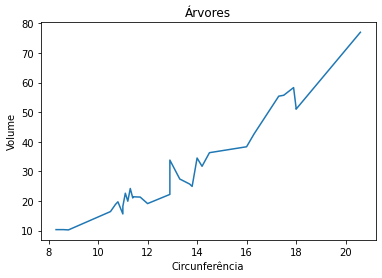

In [7]:
plt.plot(dataset.Girth, dataset.Volume)
plt.title("Árvores")
plt.xlabel("Circunferência")
plt.ylabel("Volume")

Utilizando a biblioteca `seaborn`, pode ser criado um gráfico de dispersão através do método `regplot` que tem como argumentos os dados no eixo x e y semelhante à biblioteca `pyplot`. O argumento `x_jitter` é uma pequena tremulação que é colocada nos dados para evitar que mais de um ponto seja representado no exato local de outro ponto, esse jitter é uma variação na posição, não nos dados reais, dos pontos. O argumento `fit_reg` tem valor padrão `True` e ele faz com que o método gere uma linha de tendência, caso não seja necessária, passe esse argumento como `False`.

<AxesSubplot:xlabel='Girth', ylabel='Volume'>

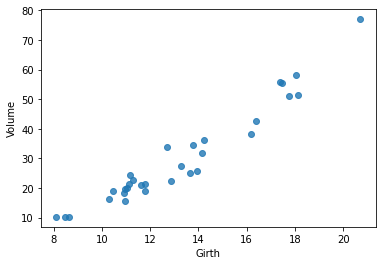

In [8]:
sns.regplot(x=dataset.Girth, y=dataset.Volume, data=dataset, x_jitter=0.3, fit_reg=False)

O conjunto de dados CO2 é referente ao tratamento de plantas que relaciona o tipo de tratamento foi realizado e a concentração de CO2 que a planta recebeu e a absorção de CO2.

Depois de importado, é feito a instanciação de variáveis com a finalidade de se criar uma legenda

In [9]:
dataset = pd.read_csv("data/co2.csv")
dataset.head()

,Plant,Type,Treatment,conc,uptake
0,Qn1,Quebec,nonchilled,95,16.0
1,Qn1,Quebec,nonchilled,175,30.4
2,Qn1,Quebec,nonchilled,250,34.8
3,Qn1,Quebec,nonchilled,350,37.2
4,Qn1,Quebec,nonchilled,500,35.3


Text(0, 0.5, 'Absorção')

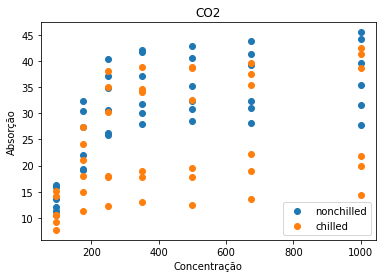

In [10]:
x = dataset.conc  # Instancia os dados da concentração de CO2 para a variável x
y = dataset.uptake  # Instancia os dados da absorção de CO2 para a variável y
unicos = list(set(dataset.Treatment))  # Gera os valores únicos de tratamento para se utilizar na legenda

# Criação da legenda
for i in range(len(unicos)):
    index = dataset.Treatment == unicos[i]
    plt.scatter(x[index], y[index], label = unicos[i])
plt.legend(loc="lower right")
plt.title("CO2")
plt.xlabel("Concentração")
plt.ylabel("Absorção")

Uma legenda é gerada junto com o gráfico para ter a representação de um terceiro atributo. O eixo x recebe a concentração de CO2 e o y recebe a absorção de CO2 a cor da legenda exprime se a planta recebeu um tratamento de resfriamento ou não.

Para criar a legenda foi necessário descobrir os valores únicos do tratamento e passálos como parâmetro no argumento `label` do método `scatter`.

Caso seja necessário comparar mais de um gráfico ao mesmo tempo, é possível através do `matplotlib` utlizar o método `figure` atrés dele, é possível girar um grid de gráfico e através das coordenadas de linhas e colunas, cria-se os gráficos com o auxílio do método `subplot`

(array([12.,  8.,  5.,  2.,  3.,  1.]),
 array([10.2       , 21.33333333, 32.46666667, 43.6       , 54.73333333,
        65.86666667, 77.        ]),
 <BarContainer object of 6 artists>)

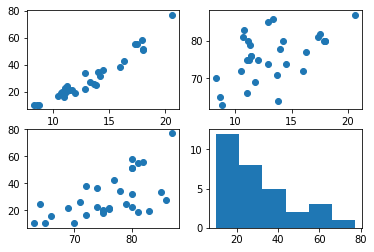

In [11]:
dataset = pd.read_csv("data/trees.csv")  # Utilizando o dataset trees. csv

# Cria-se o plot em uma figura
plt.figure(1)
plt.subplot(2, 2, 1)
plt.scatter(dataset.Girth, dataset.Volume)
plt.subplot(2, 2, 2)
plt.scatter(dataset.Girth, dataset.Height)
plt.subplot(2, 2, 3)
plt.scatter(dataset.Height, dataset.Volume)
plt.subplot(2, 2, 4)
plt.hist(dataset.Volume, bins=6)

Observa-se que em um mesma imagem foram gerados os 3 gráficos de dispersão e um histograma conforme requisitados, foi criado um grid 2x2 e os gráficos são criados preenchendo as linhas, os gráficos 1 e 2 são referentes à primeira linha e os gráficos 3 e 4 são referentes à segunda linha.

O dataset insect.csv trata da eficiência de diferentes inseticidades aplicados. O atributo `spray` é um dado categórico e para visuzalizá-lo em um gráfico é interessante fazer uma contagem das categorias.

o método `groupby` realiza esse agrupamento. Salvando os dados gerados em uma variável, lembrando que por ser um atributo de um dataset do pandas, essa variável é um objeto do tipo série do pandas. Depois disso, pode-se usar o próprio método de visualização de uma série, o método `plot.bar` para gerar um gráfico de barras e o método `plot.pie` para gerar um gráfico de setores.

In [12]:
dataset = pd.read_csv("data/insect.csv")
dataset.head()

,count,spray
0,10,A
1,7,A
2,20,A
3,14,A
4,14,A


<AxesSubplot:xlabel='spray'>

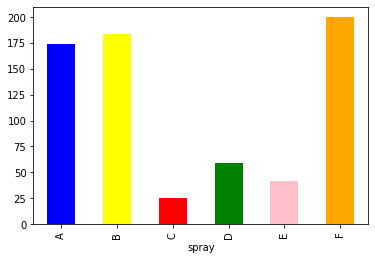

In [13]:
grupo = dataset.groupby(["spray"])["count"].sum()
grupo.plot.bar(color=["blue", "yellow", "red", "green", "pink", "orange"])

<AxesSubplot:ylabel='count'>

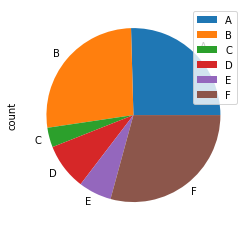

In [14]:
grupo.plot.pie(legend=True)

Apesar de não ser muito bom para visualizar dados, o gráfico de setores pode ser usado em alguns casos, principalmente quando as diferenças são muito grandes. Nesse caso é possível observar que o Spray F é o que possui a maior quantidade de insetos abatidos.

Um outro tipo de gráfico muito importante para analisar dados numéricos é o boxplot. Ele pode ser criado utilizando a biblioteca `matplotlib` e o método `boxplot`, esse método possui como argumentos o `vert` que diz a orientação do gráfico, se é vertical, `showfliers` que mostra os pontos que são outliers e o `patch_artist` que preenche o boxplot.

Text(0.5, 0, 'Volume')

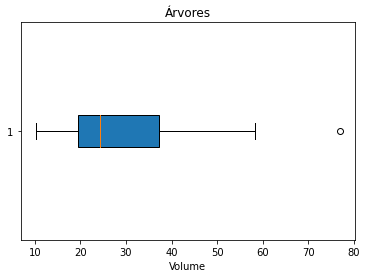

In [15]:
dataset = pd.read_csv("data/trees.csv")

plt.boxplot(dataset.Volume, vert=False, showfliers=True, patch_artist=True)
plt.title("Árvores")
plt.xlabel("Volume")

Outra forma de visualizar um boxplot é utilizando a biblioteca `seaborn` com o método `boxplot`. A biblioteca `seaborn` é uma biblioteca especializada em visualização de dados e é baseada na `matplotlib`. Com ela é possível realizar visualizações mais elaboradas, como por exemplo a representação de todos os atributos de um dataset numérico através de boxplots na mesma imagem, utilizando o mesmo método e passando o dataset inteiro como parâmetro. O que é interessante para visualizar os dados e compará-los lado a lado.

Text(0.5, 1.0, 'Árvores')

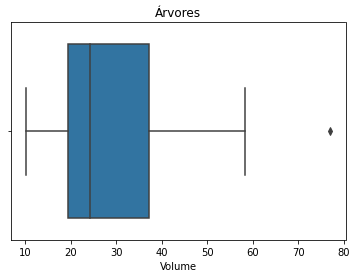

In [16]:
sns.boxplot(x=dataset.Volume).set_title("Árvores")

<AxesSubplot:>

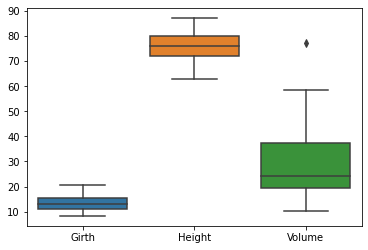

In [17]:
sns.boxplot(data=dataset)

Além do boxplot, como foi visto anteriormente, pode utilizar essa biblioteca para observar o histograma.

Text(0.5, 1.0, 'Árvores')

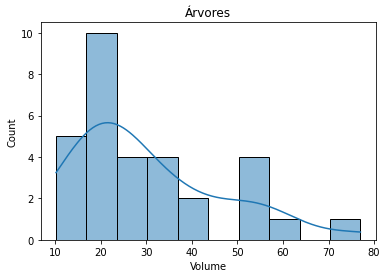

In [18]:
sns.histplot(dataset.Volume, bins=10, kde=True).set_title("Árvores")

Carregando o dataset chicken.csv que mostra a influência da alimentção no peso de frangos, para um possível estudo de como esse comportamento ocorre.

In [19]:
dataset = pd.read_csv("data/chicken.csv")
dataset.head()

,weight,feed
0,179,horsebean
1,160,horsebean
2,136,horsebean
3,227,horsebean
4,217,horsebean


Pode ser usado uma combinação das bibliotecas para gerar diversos gráficos do tipo histograma da biblioteca `seaborn` com essa visualização é possível observar a distribuição de todos os atributos conforme o peso dos frangos. O método `tight_layout` faz com que os gráificos fiquem um pouco mais estreitos, para que não haja sobreposição.

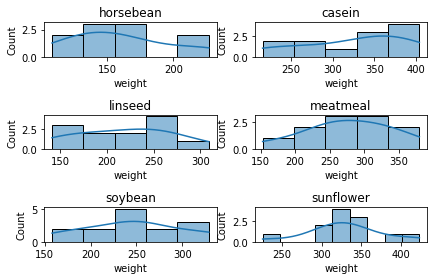

In [20]:
plt.figure()
plt.subplot(3, 2, 1)
sns.histplot(dataset.loc[dataset["feed"] == "horsebean"].weight, kde=True).set_title("horsebean")
plt.subplot(3, 2, 2)
sns.histplot(dataset.loc[dataset["feed"] == "casein"].weight, kde=True).set_title("casein")
plt.subplot(3, 2, 3)
sns.histplot(dataset.loc[dataset["feed"] == "linseed"].weight, kde=True).set_title("linseed")
plt.subplot(3, 2, 4)
sns.histplot(dataset.loc[dataset["feed"] == "meatmeal"].weight, kde=True).set_title("meatmeal")
plt.subplot(3, 2, 5)
sns.histplot(dataset.loc[dataset["feed"] == "soybean"].weight, kde=True).set_title("soybean")
plt.subplot(3, 2, 6)
sns.histplot(dataset.loc[dataset["feed"] == "sunflower"].weight, kde=True).set_title("sunflower")
plt.tight_layout()

Agora com o dataset CO2 que representa a absorção de CO2 em plantas que foram resfriadas ou não durante a noite.

Uma outra forma de representar legendas é com o `scatterplot` da biblioteca `seaborn` nesse caso, a legenda é um argumento, `hue` que será passado a categoria desejada como parâmetro.

In [21]:
dataset = pd.read_csv("data/co2.csv")
dataset.head()

,Plant,Type,Treatment,conc,uptake
0,Qn1,Quebec,nonchilled,95,16.0
1,Qn1,Quebec,nonchilled,175,30.4
2,Qn1,Quebec,nonchilled,250,34.8
3,Qn1,Quebec,nonchilled,350,37.2
4,Qn1,Quebec,nonchilled,500,35.3


<AxesSubplot:xlabel='conc', ylabel='uptake'>

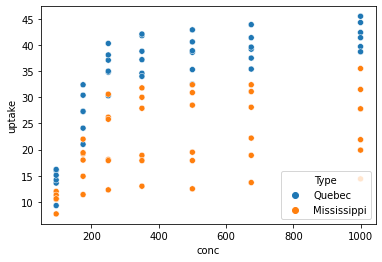

In [22]:
sns.scatterplot(x=dataset.conc, y=dataset.uptake, hue=dataset.Type)

Outra forma de visualizar dados dessa forma seria separá-los em dois gráficos diferentes.

Text(0.5, 1.0, 'Mississipi')

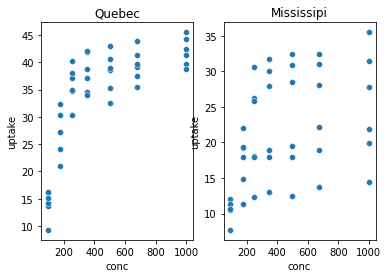

In [23]:
# Separando os dados conforme a origem
quebec = dataset.loc[dataset["Type"] == "Quebec"]
mississippi = dataset.loc[dataset["Type"] == "Mississippi"]

# Gerando os gráficos
plt.figure()
plt.subplot(1, 2, 1)
sns.scatterplot(x=quebec.conc, y=quebec.uptake).set_title("Quebec")
plt.subplot(1, 2, 2)
sns.scatterplot(x=mississippi.conc, y=mississippi.uptake).set_title("Mississipi")

Ou então serpará-los conforme o tratamento

Text(0.5, 1.0, 'Non chilled')

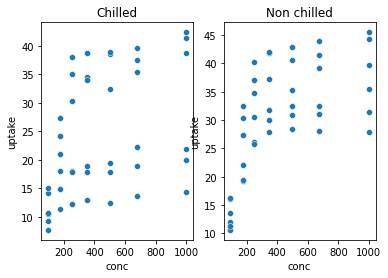

In [24]:
# Separando os dados conforme o tratamento
chilled = dataset.loc[dataset["Treatment"] == "chilled"]
nonchilled = dataset.loc[dataset["Treatment"] == "nonchilled"]

# Gerando os gráficos
plt.figure()
plt.subplot(1, 2, 1)
sns.scatterplot(x=chilled.conc, y=chilled.uptake).set_title("Chilled")
plt.subplot(1, 2, 2)
sns.scatterplot(x=nonchilled.conc, y=nonchilled.uptake).set_title("Non chilled")

A base de dados esoph, mostra dados de câncer de esôfago, e relaciona o número de casos conforme o consumo de tabaco e álcool e o número de controle.

In [25]:
dataset = pd.read_csv("data/esoph.csv")
dataset.head()

,agegp,alcgp,tobgp,ncases,ncontrols
0,25-34,0-39g/day,0-9g/day,0,40
1,25-34,0-39g/day,10-19,0,10
2,25-34,0-39g/day,20-29,0,6
3,25-34,0-39g/day,30+,0,5
4,25-34,40-79,0-9g/day,0,27


Primeiro é feita a visualização do scatterplot utilizando o método `catplot` que realiza um scatterplot de variáveis categóricas.

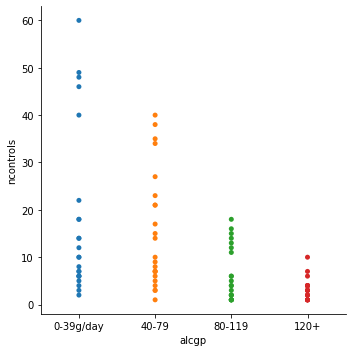

In [26]:
sns.catplot(x="alcgp", y="ncontrols", data=dataset, jitter=False)

Utilizando o argumento `col`, nota-se que é gerado um gráfico para cada categoria da variável tabaco `tobgp`

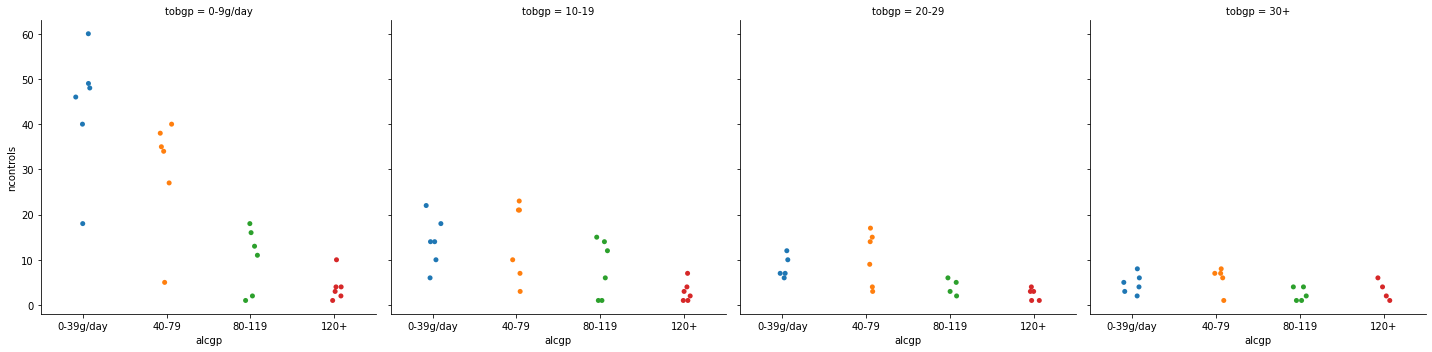

In [27]:
sns.catplot(x="alcgp", y="ncontrols", data=dataset, col="tobgp")

Não só gráficos 2D, é possível também gerar gráficos 3D, como um gráfico de dispersão 3D, lembrando que às vezes, um gráfico 3D apesar de ficar mais visualmente apelativo, pode ser mais difícil fazer a interpretação dos dados.

A base de dados orchard.csv é referente ao tratamento aplicado em orquídeas, mostrando a resposta ao tratamento realizado nelas.

Text(0.5, 0, 'Colpos')

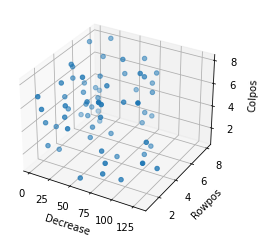

In [29]:
# Importar a base de dados
dataset = pd.read_csv("data/orchard.csv")

# Gerar o gráfico 3D
eixo = plt.figure().add_subplot(1, 1, 1, projection="3d")
eixo.scatter(dataset.decrease, dataset.rowpos, dataset.colpos)
eixo.set_xlabel("Decrease")
eixo.set_ylabel("Rowpos")
eixo.set_zlabel("Colpos")